In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

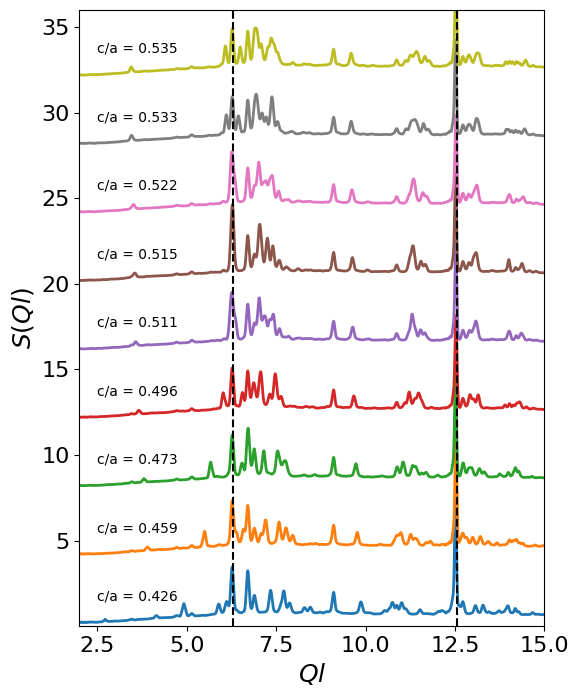

In [2]:
r_ca = [0.426,0.459,0.473,0.496,0.511,0.515,0.522,0.533,0.535]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig,ax = plt.subplots(1,1, figsize=[6, 8])
d_lines = 4
for i_r, r in enumerate(r_ca):
    # FK
    filepath = './SOQ/FK_ratio/c_FK_fluc_{:0.3f}/'.format(r)
    filename = filepath+'soq.txt'
    data = np.loadtxt(filename)

    n_particles = 480000
    Q = data[:,0]
    SQ = data[:,1]*n_particles
    SQ_sm = gaussian_filter(SQ,sigma=2)

    # FK
    Ratio_ca = 1/r
#     l_c = 1
#     l_a = 1/np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)*Ratio_ca
    l_c = 1*np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)*r
    l_a = 1*np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)
    l_square = 1

    l_c_s = 2*np.pi/l_c
    l_a_s = 2*np.pi/l_a
    
    d_c = l_c*np.array([0,0,1])
    d_a1 = l_a*np.array([1,0,0])
    d_a2 = l_a*np.array([0,1,0])
    
    d_c_s = 2*np.pi*np.cross(d_a1, d_a2)/np.dot(np.cross(d_a1, d_a2),d_c)
    d_a1_s = 2*np.pi*np.cross(d_a2, d_c)/np.dot(np.cross(d_a2, d_c),d_a1)
    d_a2_s = 2*np.pi*np.cross(d_c, d_a1)/np.dot(np.cross(d_c, d_a1),d_a2)
    
    d_s = np.vstack([d_a1_s,d_a2_s,d_c_s])

    d_002 = 2*np.pi/np.linalg.norm(np.array([0,0,2])@d_s)
    Q_002 = np.linalg.norm(np.array([0,0,2])@d_s)
    Q_004 = np.linalg.norm(np.array([0,0,4])@d_s)
    
    d_200 = 2*np.pi/np.linalg.norm(np.array([2,0,0])@d_s)
    Q_200 = np.linalg.norm(np.array([2,0,0])@d_s)
    Q_400 = np.linalg.norm(np.array([4,0,0])@d_s)
    
    d_200_sq = l_square/2
    Q_200_sq = 2*np.pi/d_200_sq
    Q_400_sq = 2*np.pi/d_200_sq*2


#     ax.plot([Q_002*d_200_sq,Q_002*d_200_sq],[0,40],'--',color='r')
    ax.plot(Q*d_200_sq,SQ_sm+i_r*d_lines,'-',linewidth=2,color=colors[i_r])
    ax.text(2.5,i_r*d_lines+1.5,'c/a = {:0.3f}'.format(r),fontsize=10)

ax.plot([Q_200_sq*d_200_sq,Q_200_sq*d_200_sq],[0,1000],'--',color='k')
ax.plot([Q_400_sq*d_200_sq,Q_400_sq*d_200_sq],[0,1000],'--',color='k')

ax.set_xlim(2,15)
ax.set_ylim(1e-2,d_lines*9)
ax.set_xlabel('$Ql_{}$',fontsize=18)
ax.set_ylabel('$S(Ql_{})$',fontsize=18)
# ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()